In [105]:
!pip3 install torchviz  # -- run on terminal

from torchviz import make_dot


Defaulting to user installation because normal site-packages is not writeable


In [106]:
import torch 
x = torch.ones(6) # input
y = torch.ones(1) # expected output

w1 = torch.rand(6, 8, requires_grad= True) # weights - 6 inouts, 8 neurons
b1 = torch.ones(8, requires_grad=True)

print(w1)

tensor([[0.7871, 0.1419, 0.8797, 0.2845, 0.7915, 0.9043, 0.7414, 0.8963],
        [0.4672, 0.7031, 0.2248, 0.4493, 0.4086, 0.8007, 0.2296, 0.9178],
        [0.8768, 0.8331, 0.6142, 0.1593, 0.3123, 0.2945, 0.8511, 0.9123],
        [0.1551, 0.2651, 0.0209, 0.8210, 0.7383, 0.1426, 0.1625, 0.3592],
        [0.6591, 0.3316, 0.6762, 0.2715, 0.4647, 0.2450, 0.9685, 0.0322],
        [0.5847, 0.1390, 0.3993, 0.2158, 0.2927, 0.2049, 0.4394, 0.5238]],
       requires_grad=True)


In [107]:
z = torch.matmul(x, w1) + b1
act1 = torch.relu(z)
print(z)

tensor([4.5300, 3.4138, 3.8151, 3.2013, 4.0081, 3.5920, 4.3924, 4.6416],
       grad_fn=<AddBackward0>)


In [108]:
# The problem
# z is a Tensor

# torch.rand() does NOT accept tensors as dimensions
# It only accepts integers (sizes)
# output of previous layern - z.shape = (8,)

# w2 = torch.rand(z.shape[0], 5, requires_grad=True)
w2 = torch.rand(act1.shape[0], 5, requires_grad=True)
print("2nd layer weights --> ", w2)

b2 = torch.ones(5, requires_grad=True)
z2 = torch.matmul(act1, w2) + b2
act2 = torch.relu(z2)
print(z2)


2nd layer weights -->  tensor([[0.5317, 0.3149, 0.7859, 0.7709, 0.1306],
        [0.0154, 0.9407, 0.6436, 0.9811, 0.9589],
        [0.0732, 0.4524, 0.6556, 0.6764, 0.0452],
        [0.1326, 0.8586, 0.2015, 0.9446, 0.6884],
        [0.4805, 0.5307, 0.3426, 0.4471, 0.6985],
        [0.5935, 0.7774, 0.6878, 0.3648, 0.0093],
        [0.6335, 0.8110, 0.4843, 0.6334, 0.3074],
        [0.8285, 0.6431, 0.1919, 0.2028, 0.5651]], requires_grad=True)
tensor([14.8512, 21.5791, 16.7651, 20.2719, 14.0475], grad_fn=<AddBackward0>)


In [109]:
# final layer
w3 = torch.rand(act2.shape[0], 1, requires_grad=True)
b3 = torch.ones(1, requires_grad=True)

z3 = torch.matmul(act2, w3) + b3
print(z3)

y_pred = torch.sigmoid(z3)
loss = torch.nn.functional.binary_cross_entropy_with_logits(y, y_pred)

tensor([40.3725], grad_fn=<AddBackward0>)


In [110]:
# DO forward pass
loss.backward()

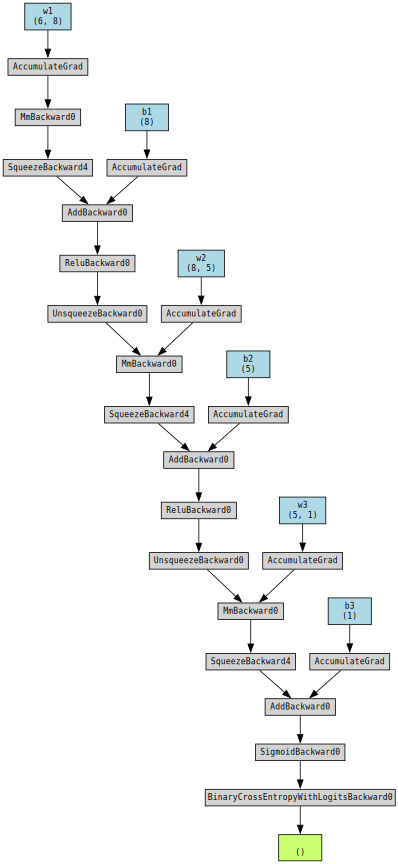

In [112]:
make_dot(loss, params={
        "x" : x, 
        "w1": w1, "b1": b1,
        "w2": w2, "b2": b2,
        "w3": w3, "b3": b3

})

*Why AccumulateGrad below it? -- Because w1.requires_grad = True* <br/><br/>
*AccumulateGrad -- Store the gradient here*<br/><br/>
*MmBackward0 -- Backward function for Matrix Multiplication* <br/> <br/>
*SqueezeBackward4 -- Backward of squeeze() operation.  ---- 1. PyTorch internally adjusts tensor shapes. 2. When broadcasting or shape alignment happens. 3. It does NOT change values, only dimensions*
